# Function projection in a MW basis

There are two equivalent representations of a function using multiwavets: the *compressed* representation and the *reconstructed* representation. The fisrt one employs the scaling functions at the coarsest scale $N_0$ (defined by the domain of the problem) and the wavelet functions at all successive scales $n = N_0, \ldots N_{max}$. The second one employs the scaling functions at scale $N_{max}+1$

Compressed representation:

$$f(x) \simeq \sum_i s^{N_0}_i \phi^0_i(x) + \sum_{n=N_{min}}^{N_{max}} \sum_l \sum_i d^n_{il} \psi^n_{il}(x)$$

Reconstructed representation:

$$f(x) \simeq \sum_l \sum_i s^{N_{max}+1}_{il} \phi^n_{il}(x)$$

The scaling and wavelet coefficients are formally obtained by projection:

$$s^n_{il} = \left\langle f(x)|\phi^n_{il}(x) \right\rangle$$
$$d^n_{il} = \left\langle f(x)|\psi^n_{il}(x) \right\rangle$$

Some practical considerations:
- The scaling coefficients $s$ are obtained by a simple quadrature scheme, often using the natural quadrature points and weights of the chosen polynomial basis
- The wavelet coefficients $d$ are obtained by (1) computing the scaling coeffients at the next scale and then performin the 
- The compressed representation shows how the scaling coefficients are used only at the coarsest scale whereas the wavelet coefficients are used at all subsequent scales
- The sum over the translation indices $l$ includes all nodes present at the given scale. In an *adaptive* representation the tree structure is terminated based on precision requirements
- The reconstructed representation (here shown for a *uniform* grid) is performed at scale $N_{max}+1$. 
- It is easy to see that the compressed and reconstructed representations have the same number of coefficients.



In [6]:
from vampyr import vampyr1d as vp1
import matplotlib.pyplot as plt
import numpy as np
mra1 = vp1.MultiResolutionAnalysis(box=[-32,32], order=7)
P_eps = vp1.ScalingProjector(mra1, prec = 1e-5)
P_fix = vp1.ScalingProjector(mra1, scale = 1)

def f(x):
    return np.exp(-x[0]**2) * np.sin(x[0])

f_fix = P_fix(f)
f_eps = P_eps(f)

In [19]:
print(f_eps)
print(f_fix)


*FunctionTree: nn
  genNodes: 0
  square norm: 0.24657
  root scale: -5
  order: 7
  nodes: 22
  endNodes: 12
  nodes per scale: 
    scale=-5  nodes=2
    scale=-4  nodes=4
    scale=-3  nodes=4
    scale=-2  nodes=4
    scale=-1  nodes=4
    scale=0  nodes=4


*FunctionTree: nn
  genNodes: 0
  square norm: 0.24657
  root scale: -5
  order: 7
  nodes: 254
  endNodes: 128
  nodes per scale: 
    scale=-5  nodes=2
    scale=-4  nodes=4
    scale=-3  nodes=8
    scale=-2  nodes=16
    scale=-1  nodes=32
    scale=0  nodes=64
    scale=1  nodes=128



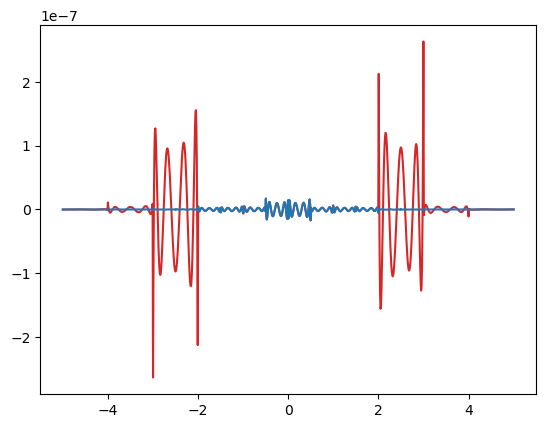

In [9]:
x_vec = np.linspace(-5, 5, 1000)
f_fix_plt = np.array([f_fix([x]) for x in x_vec ])
f_eps_plt = np.array([f_eps([x]) for x in x_vec ])
f_plt     = np.array([f([x]) for x in x_vec ])
diff_fix = f_fix_plt - f_plt
diff_eps = f_eps_plt - f_plt
plt.plot(x_vec, diff_eps, "tab:red") # your projected function
plt.plot(x_vec, diff_fix, "tab:blue") # your function
plt.show()